In [1]:
import pandas as pd
import numpy as np

# Reshaping and Pivot Tables

指数编制中，我们常常需要对时间序列进行分析，最常遇到的时间序列数据格式如下

In [14]:
df_wide = pd.DataFrame(np.random.randn(10, 5),
                  index=pd.date_range("2018-01-01", periods=10, name="trade_date"),
                  columns=pd.Index(["000001.SZ", "000002.SZ", "600000.SH", "600001.SH", "600002.SH"], name="code"))

In [17]:
df_wide.iloc[[3, 4], [2, 3]] = np.nan

In [18]:
df_wide

code,000001.SZ,000002.SZ,600000.SH,600001.SH,600002.SH
trade_date,,,,,
2018-01-01,-1.369071,-0.024736,-0.723716,-2.016626,-0.517082
2018-01-02,-1.480718,-0.334576,-0.528619,0.176407,0.170967
2018-01-03,-1.230670,0.916463,0.115243,-1.074520,-0.284804
2018-01-04,-1.560358,0.011572,NaN,NaN,1.714472
2018-01-05,-0.471852,-0.078599,NaN,NaN,-0.001956
2018-01-06,-0.481387,-0.711896,-1.493961,-0.994100,-0.244469
2018-01-07,-1.425660,0.900346,-1.655705,1.175510,0.281252
2018-01-08,-0.631120,-1.145433,-0.260002,0.619313,-0.317086
2018-01-09,3.288320,0.644505,1.899799,-0.259931,0.087787


但在数据库中，数据通常是以下面的形式存储的。

In [27]:
df_long = df_wide.stack(-1).reset_index()
df_long.rename({0: "return"},axis=1, inplace=True)
df_long

,trade_date,code,return
0,2018-01-01,000001.SZ,-1.369071
1,2018-01-01,000002.SZ,-0.024736
2,2018-01-01,600000.SH,-0.723716
3,2018-01-01,600001.SH,-2.016626
4,2018-01-01,600002.SH,-0.517082
5,2018-01-02,000001.SZ,-1.480718
6,2018-01-02,000002.SZ,-0.334576
7,2018-01-02,600000.SH,-0.528619
8,2018-01-02,600001.SH,0.176407
9,2018-01-02,600002.SH,0.170967


上下两种数据格式都是很常用的，但是他们各自都有各自的优劣势：

第一种格式的数据我们称之为宽格式数据，该类型数据的优势是，比较容易进行各种时间序列及截面的计算。   
第二种格式的数据我们称之为长格式数据，该类型数据的优势是，比较容易进行存储，以及用二维格式表示三维或更高维度数据。

在进行时间序列运算时，我们更常用的是宽格式数据，因为这种数据比较适合计算，而有时候我们又需要将宽格式数据转换成长格式数据，以进行数据的存储和交互，例如，我们的指数分析模块接收的数据就是一种长格式的数据。

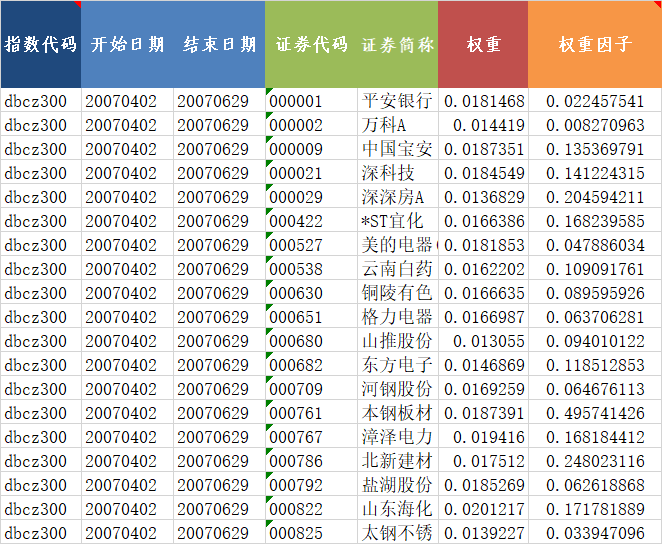




长格式数据与宽格式数据的交互就是我们这次的主要内容

## pivot

从数据库等数据来源获取长格式数据的DataFrame之后，可以使用pivot方法将其转换为宽格式数据

我们继续使用上面的数据作为例子

In [36]:
df_long

,trade_date,code,return
0,2018-01-01,000001.SZ,-1.369071
1,2018-01-01,000002.SZ,-0.024736
2,2018-01-01,600000.SH,-0.723716
3,2018-01-01,600001.SH,-2.016626
4,2018-01-01,600002.SH,-0.517082
5,2018-01-02,000001.SZ,-1.480718
6,2018-01-02,000002.SZ,-0.334576
7,2018-01-02,600000.SH,-0.528619
8,2018-01-02,600001.SH,0.176407
9,2018-01-02,600002.SH,0.170967


在指定了index和columns后,pivot方法可以轻松实现数据格式转换.

但是要稍稍注意一下,values参数为单个列标签和list of 列标签的区别  
values参数为单个列标签时,生成的DataFrame的columns为Index  
values参数为list of 列标签时,生成的DataFrame的columns为MultiIndex

In [42]:
df_long.pivot(index="trade_date", columns="code", values="return")

code,000001.SZ,000002.SZ,600000.SH,600001.SH,600002.SH
trade_date,,,,,
2018-01-01,-1.369071,-0.024736,-0.723716,-2.016626,-0.517082
2018-01-02,-1.480718,-0.334576,-0.528619,0.176407,0.170967
2018-01-03,-1.230670,0.916463,0.115243,-1.074520,-0.284804
2018-01-04,-1.560358,0.011572,NaN,NaN,1.714472
2018-01-05,-0.471852,-0.078599,NaN,NaN,-0.001956
2018-01-06,-0.481387,-0.711896,-1.493961,-0.994100,-0.244469
2018-01-07,-1.425660,0.900346,-1.655705,1.175510,0.281252
2018-01-08,-0.631120,-1.145433,-0.260002,0.619313,-0.317086
2018-01-09,3.288320,0.644505,1.899799,-0.259931,0.087787


In [46]:
df_long.pivot(index="trade_date", columns="code", values="return").columns

Index(['000001.SZ', '000002.SZ', '600000.SH', '600001.SH', '600002.SH'], dtype='object', name='code')

In [48]:
df_long.pivot(index="trade_date", columns="code", values=["return"])

return                                        
code       000001.SZ 000002.SZ 600000.SH 600001.SH 600002.SH
trade_date                                                  
2018-01-01 -1.369071 -0.024736 -0.723716 -2.016626 -0.517082
2018-01-02 -1.480718 -0.334576 -0.528619  0.176407  0.170967
2018-01-03 -1.230670  0.916463  0.115243 -1.074520 -0.284804
2018-01-04 -1.560358  0.011572       NaN       NaN  1.714472
2018-01-05 -0.471852 -0.078599       NaN       NaN -0.001956
2018-01-06 -0.481387 -0.711896 -1.493961 -0.994100 -0.244469
2018-01-07 -1.425660  0.900346 -1.655705  1.175510  0.281252
2018-01-08 -0.631120 -1.145433 -0.260002  0.619313 -0.317086
2018-01-09  3.288320  0.644505  1.899799 -0.259931  0.087787
2018-01-10 -0.722113  1.038529 -1.620239 -0.489816  1.238832

In [49]:
df_long.pivot(index="trade_date", columns="code", values=["return"]).columns

MultiIndex(levels=[['return'], ['000001.SZ', '000002.SZ', '600000.SH', '600001.SH', '600002.SH']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'code'])

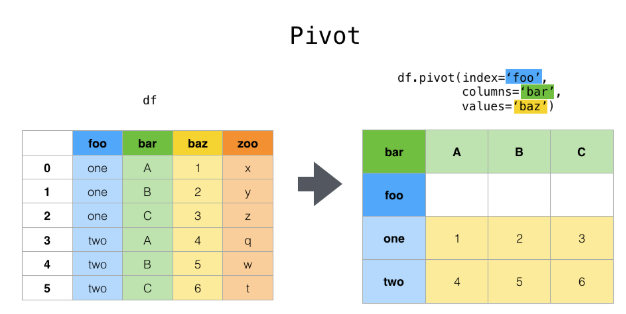

如果要实现类似unpivot的操作,需要使用stack函数

In [52]:
df_wide

code,000001.SZ,000002.SZ,600000.SH,600001.SH,600002.SH
trade_date,,,,,
2018-01-01,-1.369071,-0.024736,-0.723716,-2.016626,-0.517082
2018-01-02,-1.480718,-0.334576,-0.528619,0.176407,0.170967
2018-01-03,-1.230670,0.916463,0.115243,-1.074520,-0.284804
2018-01-04,-1.560358,0.011572,NaN,NaN,1.714472
2018-01-05,-0.471852,-0.078599,NaN,NaN,-0.001956
2018-01-06,-0.481387,-0.711896,-1.493961,-0.994100,-0.244469
2018-01-07,-1.425660,0.900346,-1.655705,1.175510,0.281252
2018-01-08,-0.631120,-1.145433,-0.260002,0.619313,-0.317086
2018-01-09,3.288320,0.644505,1.899799,-0.259931,0.087787


DataFrame的stack方法默认会生成MutiIndex

In [51]:
df_wide.stack()

trade_date  code     
2018-01-01  000001.SZ   -1.369071
            000002.SZ   -0.024736
            600000.SH   -0.723716
            600001.SH   -2.016626
            600002.SH   -0.517082
2018-01-02  000001.SZ   -1.480718
            000002.SZ   -0.334576
            600000.SH   -0.528619
            600001.SH    0.176407
            600002.SH    0.170967
2018-01-03  000001.SZ   -1.230670
            000002.SZ    0.916463
            600000.SH    0.115243
            600001.SH   -1.074520
            600002.SH   -0.284804
2018-01-04  000001.SZ   -1.560358
            000002.SZ    0.011572
            600002.SH    1.714472
2018-01-05  000001.SZ   -0.471852
            000002.SZ   -0.078599
            600002.SH   -0.001956
2018-01-06  000001.SZ   -0.481387
            000002.SZ   -0.711896
            600000.SH   -1.493961
            600001.SH   -0.994100
            600002.SH   -0.244469
2018-01-07  000001.SZ   -1.425660
            000002.SZ    0.900346
            600000.SH   -1